In [69]:
import sys
#!{sys.executable} -m pip install xlrd

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from cycler import cycler

In [52]:
def findNumRuns(df):
    descriptor = df.columns[-1]
    return int(re.findall('(\d+)', descriptor)[0])

In [170]:
def plotExperiment(params):
    df = pd.read_excel("{}.xls".format(params["src"]))
    runs = findNumRuns(df)
    ignore = params["ignore"] if "ignore" in params else []

    colors = plt.cm.viridis(np.linspace(0, 1, runs-len(ignore)))
    default_cycler = cycler(color=colors)
    plt.rc('axes', prop_cycle=default_cycler)

    names = ["{}({})".format(params["y"],x+1) for x in range(runs) if x not in ignore]
    legend_keys = ["{}({})".format(params["legend"],x+1) for x in range(runs) if x not in ignore]

    df.plot(x="{}(1)".format(params["x"]), y=names, logy=params["logy"], ax=plt.gca() if "join" in params and params["join"] else None)
    plt.title(params["title"])
    plt.xlabel(name_mapping[params["x"]])
    plt.ylabel(name_mapping[params["y"]])
    plt.grid()
    if "ylim" in params:
        plt.ylim(params["ylim"])

    L=plt.legend(title=name_mapping[params["legend"]])
    for i, key in enumerate(legend_keys):
         L.get_texts()[i].set_text(round(df[key][0], 2))

    plt.savefig("{}/{}.svg".format(folder, params["title"].replace(" ", "_")))


In [171]:
name_mapping = {"DrainI": "Drain current [A]", "GateV": "Gate voltage [V]", "DrainV": "Drain voltage [V]", "BulkV": "Program voltage [V]", "BulkI": "Program gate leakage [A]"}
folder = "plots"
width = 3

WARNING *** file size (42333) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (51220) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (55129) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (51220) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (55129) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (55129) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (42333) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

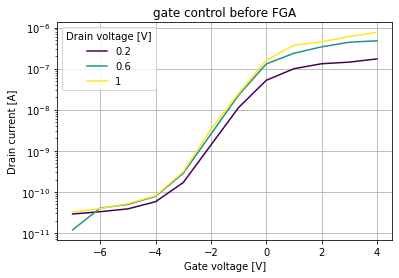

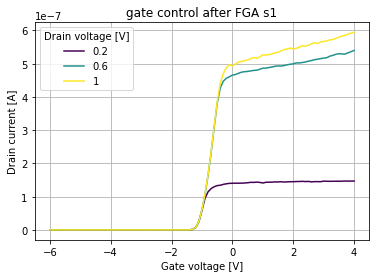

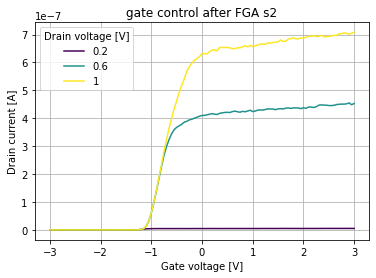

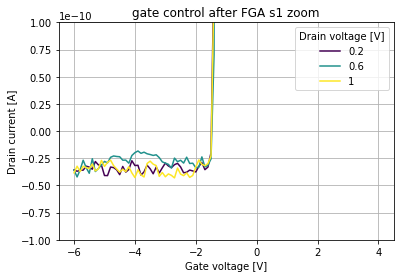

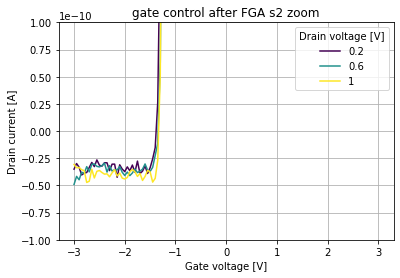

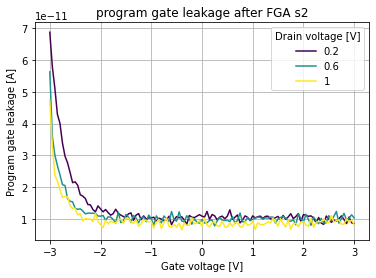

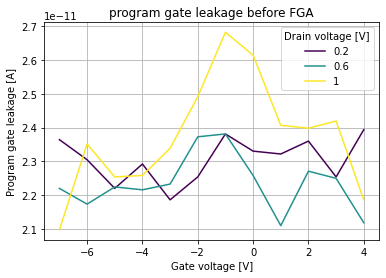

In [172]:
params = [
    {"src": "Group3/test11", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "gate control before FGA", "logy": True},
    {"src": "Group3/After FGA/After_FGA/2-1/test11", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "gate control after FGA s1", "logy": False},
    {"src": "Group3/After FGA/After_FGA/2-2/test11-2-2", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "gate control after FGA s2", "logy": False},
    {"src": "Group3/After FGA/After_FGA/2-1/test11", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "gate control after FGA s1 zoom", "logy": False, "ylim":[-1e-10, 1e-10]},
    {"src": "Group3/After FGA/After_FGA/2-2/test11-2-2", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "gate control after FGA s2 zoom", "logy": False, "ylim":[-1e-10, 1e-10]},
    {"src": "Group3/After FGA/After_FGA/2-2/test11-2-2", "y": "BulkI", "x": "GateV", "legend": "DrainV", "title": "program gate leakage after FGA s2", "logy": False},
    {"src": "Group3/test11", "y": "BulkI", "x": "GateV", "legend": "DrainV", "title": "program gate leakage before FGA", "logy": False},
    #{"src": "Group1/cmos_sample1_6", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "G1 gate control before FGA", "logy": True},
    #{"src": "Group1/afterFGA/cmos_device3-3_fga_bulk4V_idvgs", "y": "DrainI", "x": "GateV", "legend": "DrainV", "title": "G1 gate control after FGA", "logy": True, "ignore":[0]}
]

for p in params:
    plotExperiment(p)
    #plt.close()

WARNING *** file size (67969) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (70021) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (69933) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


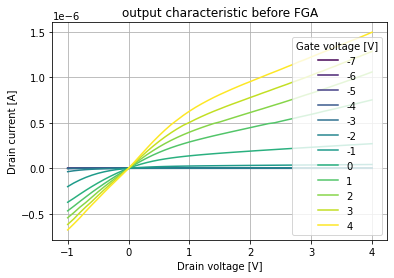

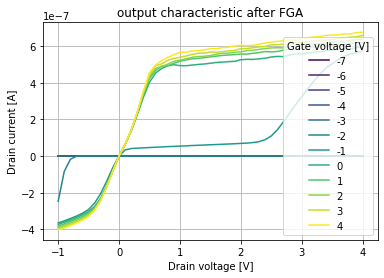

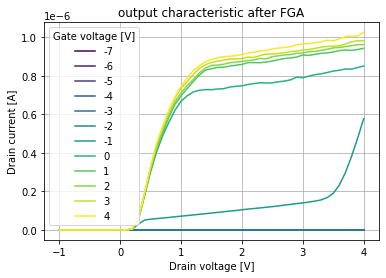

In [140]:
params = [
    {"src": "Group3/test12", "y": "DrainI", "x": "DrainV", "legend": "GateV", "title": "output characteristic before FGA", "logy": False},
    {"src": "Group3/After FGA/After_FGA/2-1/test12", "y": "DrainI", "x": "DrainV", "legend": "GateV", "title": "output characteristic after FGA", "logy": False},
    {"src": "Group3/After FGA/After_FGA/2-2/test12", "y": "DrainI", "x": "DrainV", "legend": "GateV", "title": "output characteristic after FGA", "logy": False},
    #{"src": "Group3/After FGA/After_FGA/2-1/new1", "y": "DrainI", "x": "DrainV", "legend": "GateV", "title": "output characteristic after LGA extended", "logy": False},
]

for p in params:
    plotExperiment(p)
    #plt.close()

WARNING *** file size (120461) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


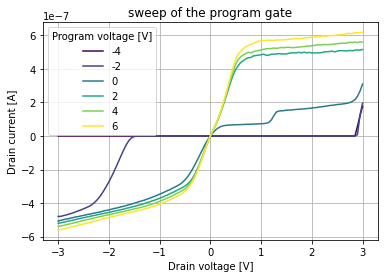

In [139]:
params = [
    {"src": "Group3/After FGA/After_FGA/2-1/programsweep", "y": "DrainI", "x": "DrainV", "legend": "BulkV", "title": "sweep of the program gate", "logy": False, "ignore": [1,3,5,7,9,11]},
]

for p in params:
    plotExperiment(p)